In [1]:
import pandas as pd

In [2]:
surveys_df = pd.read_csv('data/surveys.csv')

In [3]:
type(surveys_df)

pandas.core.frame.DataFrame

In [4]:
surveys_df['sex'].dtype

dtype('O')

In [5]:
surveys_df['record_id'].dtype

dtype('int64')

In [6]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [7]:
print(5+5)

10


In [8]:
print(int(2/3))

0


In [9]:
a = 7.83
int(a)

7

In [10]:
b = 7
b = float(b)
print(b)

7.0


In [11]:
surveys_df['record_id'] = surveys_df['record_id'].astype('float64')
surveys_df.dtypes

record_id          float64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [12]:
surveys_df['plot_id'] = surveys_df['plot_id'].astype('float64')
surveys_df['weight'] = surveys_df['weight'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
surveys_df['weight'].mean()

In [ ]:
len(surveys_df[pd.isnull(surveys_df.weight)])

In [ ]:
df1 = surveys_df.copy()
df1['weight'] = df1['weight'].fillna(0)

In [ ]:
df1['weight'].mean()

In [ ]:
len(df1[pd.isnull(df1.weight)])

In [ ]:
mean_weight=surveys_df['weight'].mean()
df2 = surveys_df.copy()
df2['weight'] = df2['weight'].fillna(mean_weight)
len(df2[pd.isnull(df2.weight)])
df2['weight'].mean()

In [ ]:
df_na = surveys_df.dropna()
df_na

In [ ]:
df_na.to_csv('surveys_complete.csv',index=False)

In [ ]:
surveys_complete = pd.read_csv('surveys_complete.csv')
surveys_complete

In [ ]:
surveys_df = pd.read_csv('data/surveys.csv',keep_default_na=False,na_values=[""])
surveys_df
surveys_df.dtypes

In [ ]:
species_df = pd.read_csv('data/species.csv',
                         keep_default_na=False,na_values=[""])
species_df

In [ ]:
#Read in the first 10 lines
surveys_sub = surveys_df.head(10)
print(surveys_sub)
surveys_sub_last10 = surveys_df.tail(10)
#surveys_sub_last10 = surveys_sub_last10.reset_index(drop=True)
print(surveys_sub_last10)

In [ ]:
vertical_stack = pd.concat([surveys_sub,surveys_sub_last10],axis=0)
vertical_stack = vertical_stack.reset_index(drop=True)
vertical_stack

In [ ]:
horizontal_stack = pd.concat([surveys_sub,surveys_sub_last10],axis=1)
horizontal_stack

In [ ]:
# Joining

print(surveys_sub.columns)
print(species_df.columns)

In [ ]:
merged_inner = pd.merge(left=surveys_sub,right=species_df,
                        left_on='species_id',right_on='species_id')
print(merged_inner.shape)
print(merged_inner)

In [ ]:
merged_left = pd.merge(left=surveys_sub,right=species_df,
                       how='left',left_on='species_id',right_on='species_id')
print(merged_left.shape)
display(merged_left)

Do a join on surveys_df. How many measurements have a genus?

In [ ]:
full_inner = pd.merge(left=surveys_df,right=species_df,left_on='species_id',right_on='species_id')
print(full_inner.shape)
print(full_inner['genus'].count())

In [1]:
import plotnine as p9

In [2]:
import pandas as pd
surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

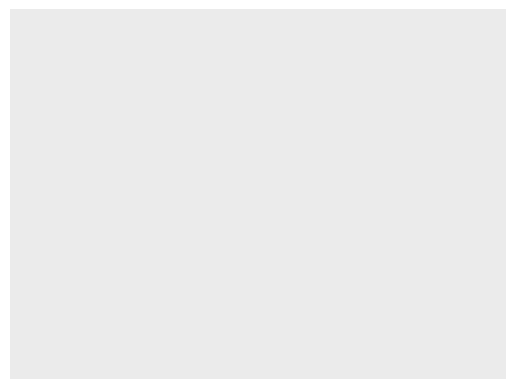

<ggplot: (7552875185)>

In [3]:
p9.ggplot(data=surveys_complete)

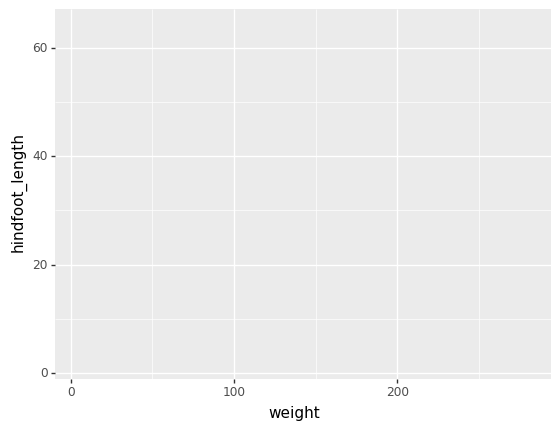

<ggplot: (7554816597)>

In [4]:
p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='weight',y='hindfoot_length'))

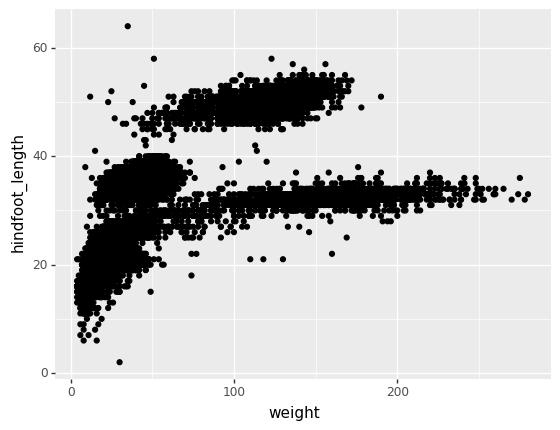

<ggplot: (7552875025)>

In [7]:
p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='weight',y='hindfoot_length')
         ) + p9.geom_point()

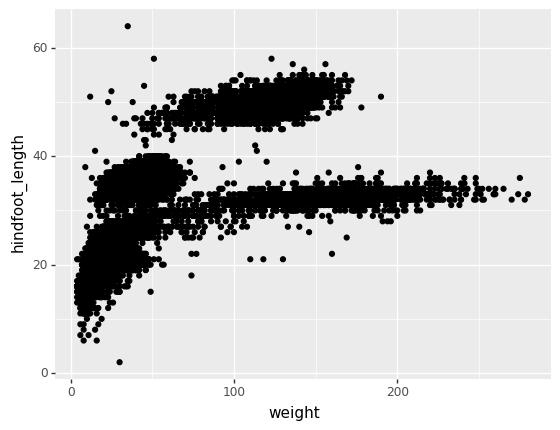

<ggplot: (7554554573)>

In [9]:
plot = p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='weight',y='hindfoot_length'))
plot + p9.geom_point()

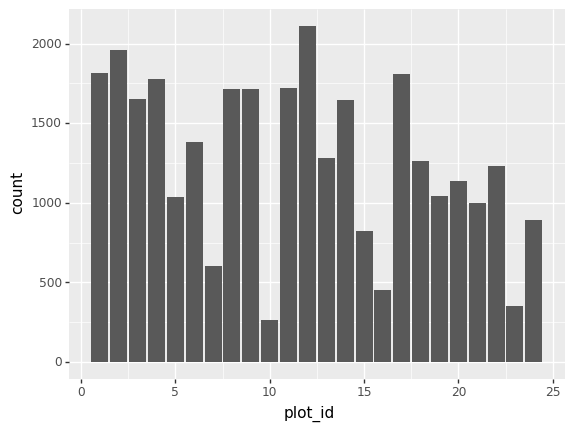

<ggplot: (7554780145)>

In [11]:
#Exercise - make a bar plot number of records for each plot
bar_plot = p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='plot_id'))
bar_plot + p9.geom_bar()

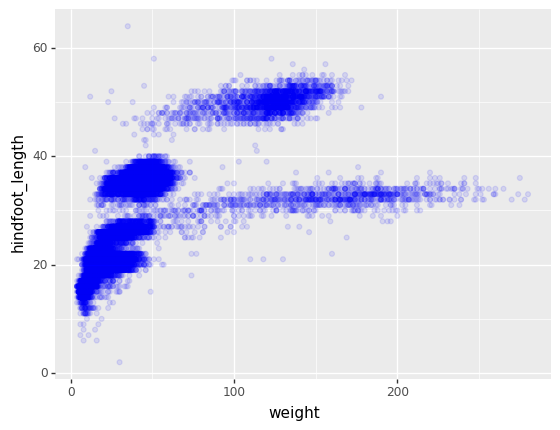

<ggplot: (7558388433)>

In [18]:
plot + p9.geom_point(alpha=0.1,color='blue')

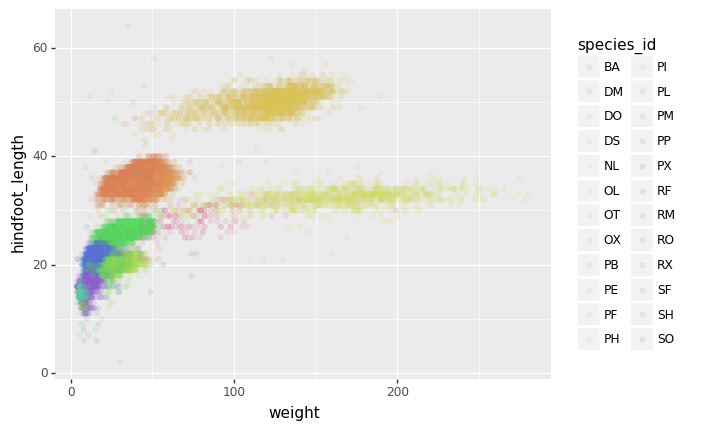

<ggplot: (300783261)>

In [20]:
plot = p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='weight',
                        y='hindfoot_length',color='species_id'))
plot + p9.geom_point(alpha=0.1)

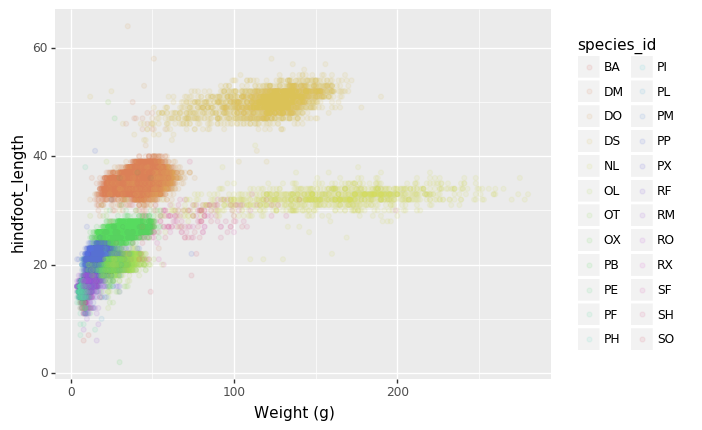

<ggplot: (7553642729)>

In [21]:
plot + p9.geom_point(alpha=0.1) + p9.xlab("Weight (g)")

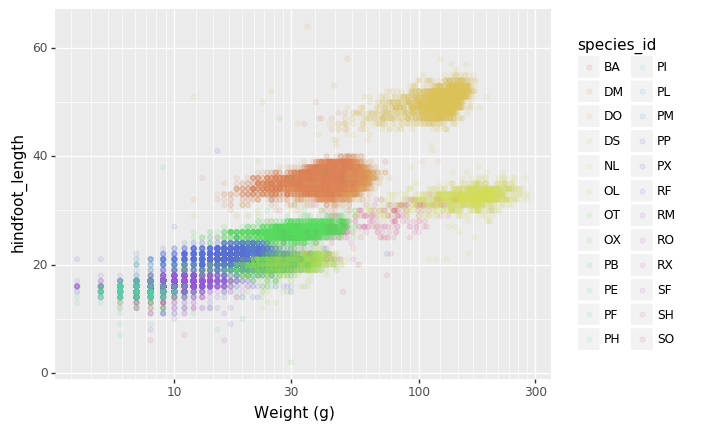

<ggplot: (7554424089)>

In [22]:
plot + p9.geom_point(alpha=0.1) + p9.xlab("Weight (g)") + p9.scale_x_log10()

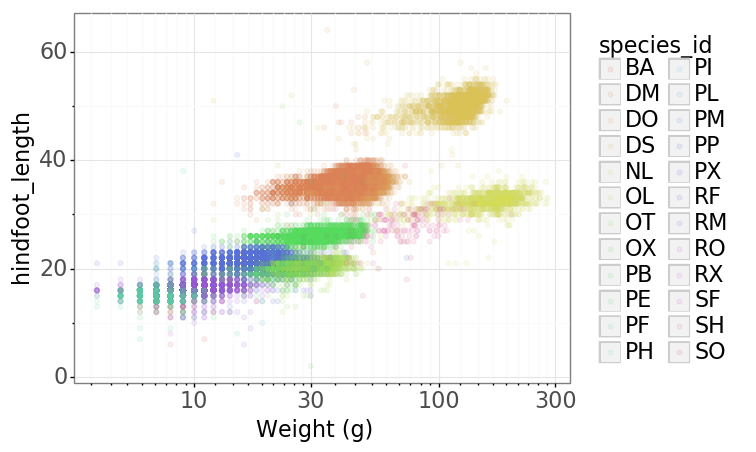

<ggplot: (7555370881)>

In [26]:
(
plot + p9.geom_point(alpha=0.1) 
+ p9.xlab("Weight (g)") 
+ p9.scale_x_log10() 
+ p9.theme_bw()
+ p9.theme(text=p9.element_text(size=16))
)

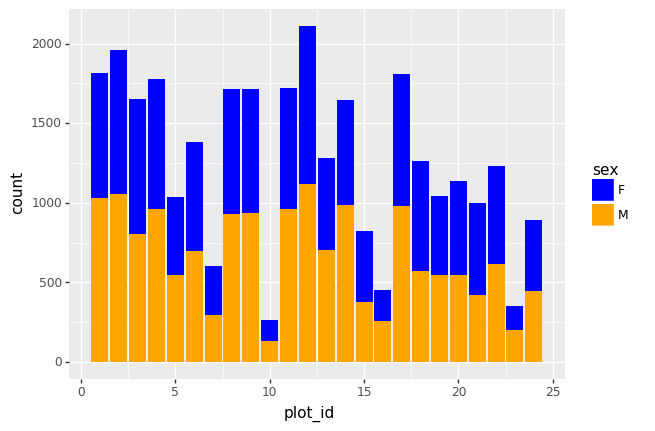

<ggplot: (7554670417)>

In [29]:
#Exercise - make a bar plot number of records for each plot
#Exercist - Have sex show up as color. Use blue and orange for colors
bar_plot = p9.ggplot(data=surveys_complete,
         mapping=p9.aes(x='plot_id',fill='sex'))
bar_plot + p9.geom_bar() + p9.scale_fill_manual(["blue","orange"])

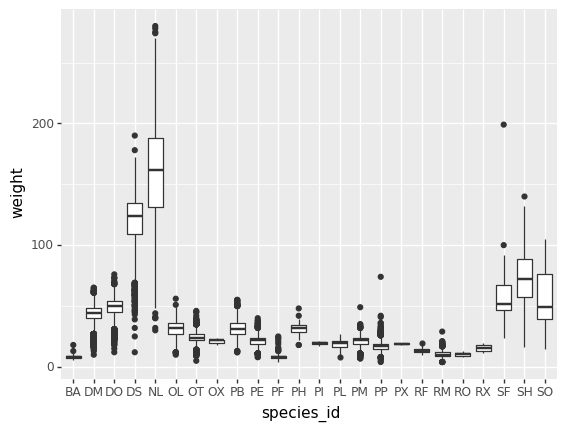

<ggplot: (7554816541)>

In [32]:
plot = p9.ggplot(data=surveys_complete,
                mapping=p9.aes(x='species_id',y='weight'))

plot + p9.geom_boxplot()

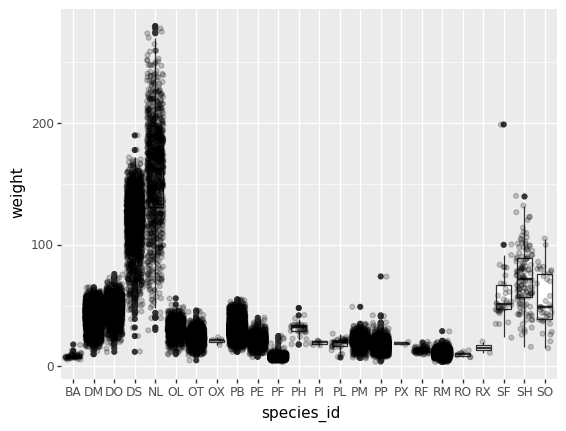

<ggplot: (7556430553)>

In [36]:
plot + p9.geom_boxplot() + p9.geom_jitter(alpha=0.2)

In [38]:
year_counts = surveys_complete.groupby(['year','species_id'])['species_id'].count()
print(year_counts)

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64


In [42]:
year_counts = year_counts.reset_index()
print(year_counts)

     index  year species_id  counts
0        0  1977         DM     181
1        1  1977         DO      12
2        2  1977         DS      29
3        3  1977         OL       1
4        4  1977         OX       2
..     ...   ...        ...     ...
327    327  2002         PP     375
328    328  2002         RM      20
329    329  2002         RO       7
330    330  2002         SF       5
331    331  2002         SH       9

[332 rows x 4 columns]


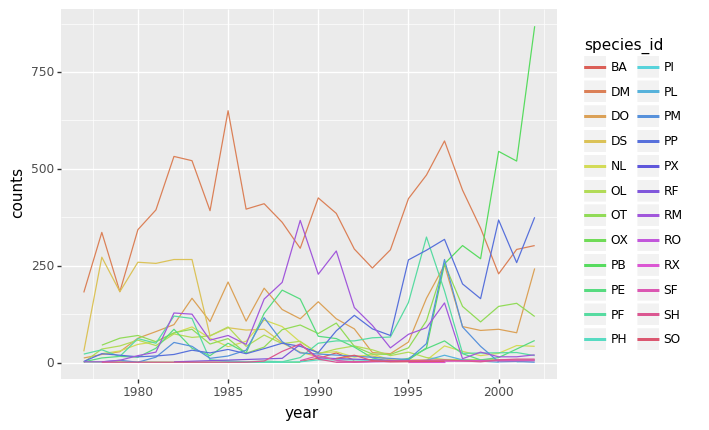

<ggplot: (7558455493)>

In [61]:
plot = p9.ggplot(data=year_counts,mapping=p9.aes(x='year',y='counts',color='species_id'))
plot + p9.geom_line() 

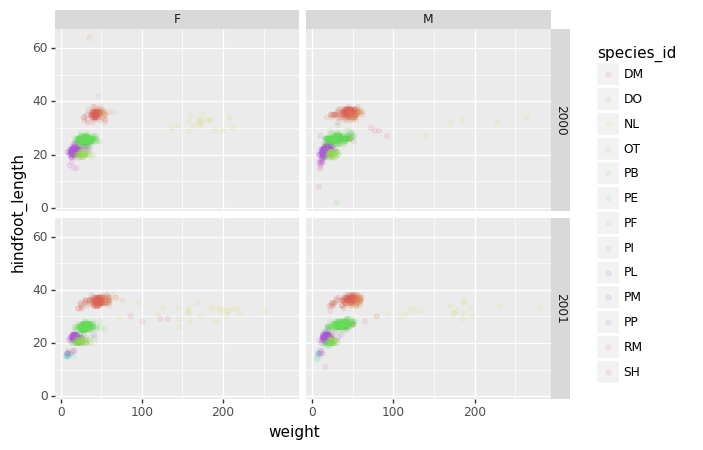

<ggplot: (7554196977)>

In [54]:
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001])]

(p9.ggplot(data=survey_2000,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("year ~ sex")
)

In [55]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=10))

In [59]:
my_plot = (
p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + my_custom_theme
)
my_plot.save("my_plot.png",width=10,height=10,dpi=300)

/Users/tmorrell/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/tmorrell/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: my_plot.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
